In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df=pd.read_csv('D:\ITtools\Dataset\creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
x=df.iloc[:,29].values
y=df.iloc[:,30].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['Amount']],df[['Class']],test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
y_pre=lr.predict(x_test)

C:\Users\KD\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
lr.score(x_test,y_test)

0.9982268881008391

In [7]:
import statsmodels.formula.api as sm
model=sm.ols(formula='Class ~ Amount',data=df)
fitt=model.fit()
print(fitt.rsquared,fitt.rsquared_adj)

3.17166419300241e-05 2.8205578980533552e-05


In [8]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pre)
print(metrics.accuracy_score(y_test,y_pre))

0.9982268881008391


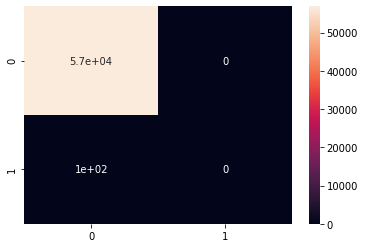

In [9]:
import seaborn as sb
sb.heatmap(cm,annot=True)